In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import datetime

In [2]:
warnings.filterwarnings('ignore')
trans=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')
newcust=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')
custdem=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerDemographic')
custadd=pd.read_excel(r"/content/drive/MyDrive/kpmg/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress')

In [3]:
trans.columns = trans.iloc[0]
trans = trans[1:]
newcust.columns = newcust.iloc[0]
newcust = newcust[1:]
custdem.columns = custdem.iloc[0]
custdem = custdem[1:]
custadd.columns = custadd.iloc[0]
custadd = custadd[1:]

In [4]:
custdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [5]:
custadd.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [7]:
trans["transaction_id"] = trans["transaction_id"].astype(str).astype(int)
trans["product_id"] = trans["product_id"].astype(str).astype(int)
trans["customer_id"] = trans["customer_id"].astype(str).astype(int)
trans["list_price"] = trans["list_price"].astype(str).astype(float)
trans["standard_cost"] = trans["standard_cost"].astype(str).astype(float)
trans["product_first_sold_date"] = trans["product_first_sold_date"].astype(str).astype(float)
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'], unit='s')
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'], format = '%Y-%m-%d %H:%M:%S')
trans['product_first_sold_date'].head()
trans['transaction_month'] = trans['transaction_date'].dt.strftime('%b')

In [8]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
trans.dropna(inplace=True)
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,Feb
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,May
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,Oct
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,Aug
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23,Jun
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40,Nov
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30,Apr
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56,Jul


In [10]:
trans.isna().sum()

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
transaction_month          0
dtype: int64

In [11]:
trans['profit'] = trans['list_price']-trans['standard_cost']
trans['profit_margin'] = trans['list_price']*100/trans['standard_cost']

In [12]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,profit,profit_margin
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,Feb,17.87,133.327117
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,May,1702.55,537.763550
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,Oct,1544.61,720.774054
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,Aug,817.36,314.473891
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,Oct,1055.82,248.816034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23,Jun,802.26,166.666113
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40,Nov,104.24,133.331202
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30,Apr,1592.19,3661.149631
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56,Jul,91.15,166.664229


In [13]:
custdem.isna().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [14]:
custdem = custdem[custdem['DOB'].notna()]
custdem['DOB'] = pd.to_datetime(custdem['DOB'], format = '%Y-%m-%d %H:%M:%S')
custdem["Age"] = custdem["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))

In [15]:
custdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,68
2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,41
3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,67
4,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,60
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,44


In [16]:
custdem["customer_id"] = custdem["customer_id"].astype(str).astype(int)

In [17]:
custdem["past_3_years_bike_related_purchases"] = custdem["past_3_years_bike_related_purchases"].astype(str).astype(int)

In [18]:
custdem["tenure"] = custdem["tenure"].astype(str).astype(int)

In [19]:
custdem.drop(columns=['default'],inplace=True)

In [20]:
custdem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3792 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3416 non-null   object        
 7   job_industry_category                3257 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car    

In [21]:
custdem.last_name = custdem.last_name.fillna('')

In [22]:
custdem.dropna(subset=['job_title','job_industry_category'], how='all',inplace=True)
custdem.isna().sum()

0
customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              392
job_industry_category                  551
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                      0
dtype: int64

In [23]:
custdem.reset_index(inplace=True,drop=True)

In [24]:
for i in range(len(custdem)):
    if(custdem.job_industry_category.isna()[i]):
        for j in range(len(custdem)):
            if(custdem.job_title[j]==custdem.job_title[i] and custdem.job_industry_category.isna()[j]==False):
                custdem.job_industry_category[i]=custdem.job_industry_category[j]
                break

In [25]:
custdem.isna().sum()

0
customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              392
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                      0
dtype: int64

In [26]:
custdem.loc[custdem['Age'] < 100, 'Age_category'] = 'Senior Citizen [>60]'
custdem.loc[custdem['Age'] < 61, 'Age_category'] = 'Senior Adult [50 to 60]'
custdem.loc[custdem['Age'] < 50, 'Age_category'] = 'Adult [25 to 49]'
custdem.loc[custdem['Age'] < 24, 'Age_category'] = 'Youth [<24]'

In [27]:
custdem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_category
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,68,Senior Citizen [>60]
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,41,Adult [25 to 49]
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,67,Senior Citizen [>60]
3,4,Talbot,,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7,60,Senior Adult [50 to 60]
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Retail,Affluent Customer,N,Yes,8,44,Adult [25 to 49]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14,46,Adult [25 to 49]
3804,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19,46,Adult [25 to 49]
3805,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1,20,Youth [<24]
3806,3999,Patrizius,,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10,48,Adult [25 to 49]


In [28]:
custdem['gender'].replace('F', 'Female',inplace=True)
custdem['gender'].replace('Femal', 'Female',inplace=True)

In [ ]:
custdem.dropna(inplace=True)

In [29]:
custdem = custdem[custdem.gender != 'U']

In [30]:
custadd

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [31]:
custadd['state'].replace('Victoria', 'VIC',inplace=True)
custadd['state'].replace('New South Wales', 'NSW',inplace=True)

In [32]:
custadd.dtypes

0
customer_id           object
address               object
postcode              object
state                 object
country               object
property_valuation    object
dtype: object

In [33]:
custadd["customer_id"] = custadd["customer_id"].astype(str).astype(int)
custadd["postcode"] = custadd["postcode"].astype(str).astype(int)
custadd["property_valuation"] = custadd["property_valuation"].astype(str).astype(int)

In [34]:
com1 = pd.merge(custdem, custadd, on='customer_id')
com1

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_category,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,68,Senior Citizen [>60],060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,41,Adult [25 to 49],6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7,60,Senior Adult [50 to 60],0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Retail,Affluent Customer,N,Yes,8,44,Adult [25 to 49],17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13,55,Senior Adult [50 to 60],9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14,46,Adult [25 to 49],613 Erie Lane,2088,NSW,Australia,12
3800,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19,46,Adult [25 to 49],0 Transport Center,3977,VIC,Australia,6
3801,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1,20,Youth [<24],4 Dovetail Crossing,2350,NSW,Australia,2
3802,3999,Patrizius,,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10,48,Adult [25 to 49],1482 Hauk Trail,3064,VIC,Australia,3


In [36]:
com1.reset_index(inplace=True,drop=True)

In [37]:
com1.to_csv("custdem.csv",index=False)

In [ ]:
trans.to_csv("transac.csv",index=False)
com1.to_csv("custdem.csv",index=False)

In [ ]:
full_com = pd.merge(trans, com1, on='customer_id')
full_com

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,profit,profit_margin,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_category,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,Feb,17.87,133.327117,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,66,Senior Citizen [>60],984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,1970-01-01 10:27:39,Oct,448.68,146.991056,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,66,Senior Citizen [>60],984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,478.16,298.72,1970-01-01 11:14:47,Apr,179.44,160.069630,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,66,Senior Citizen [>60],984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,May,1702.55,537.763550,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10,42,Adult [25 to 49],4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,1970-01-01 11:17:29,Oct,451.65,166.666175,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10,42,Adult [25 to 49],4 Shopko Circle,2196,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14049,18165,86,3446,2017-12-03,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:36:46,Dec,110.56,188.398497,Gard,Tidy,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,N,No,14,54,Senior Adult [50 to 60],8 Becker Drive,4868,QLD,Australia,4
14050,18735,45,3168,2017-02-21,True,Approved,Solex,Standard,medium,medium,441.49,84.99,1970-01-01 11:42:52,Feb,356.50,519.461113,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22,45,Adult [25 to 49],88 Rutledge Crossing,4215,QLD,Australia,7
14051,18789,83,3168,2017-04-11,False,Approved,Solex,Touring,medium,large,2083.94,675.03,1970-01-01 11:11:43,Apr,1408.91,308.718131,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22,45,Adult [25 to 49],88 Rutledge Crossing,4215,QLD,Australia,7
14052,19113,3,3168,2017-06-03,False,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 10:30:23,Jun,1702.55,537.763550,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22,45,Adult [25 to 49],88 Rutledge Crossing,4215,QLD,Australia,7


In [ ]:
full_com['transaction_month'] = full_com['transaction_date'].dt.strftime('%b')

In [ ]:
full_com

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,profit,profit_margin,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_category,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,Feb,17.87,133.327117,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,66,Senior Citizen [>60],984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,1970-01-01 10:27:39,Oct,448.68,146.991056,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,66,Senior Citizen [>60],984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,478.16,298.72,1970-01-01 11:14:47,Apr,179.44,160.069630,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,66,Senior Citizen [>60],984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,May,1702.55,537.763550,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10,42,Adult [25 to 49],4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,1970-01-01 11:17:29,Oct,451.65,166.666175,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10,42,Adult [25 to 49],4 Shopko Circle,2196,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14049,18165,86,3446,2017-12-03,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:36:46,Dec,110.56,188.398497,Gard,Tidy,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,N,No,14,54,Senior Adult [50 to 60],8 Becker Drive,4868,QLD,Australia,4
14050,18735,45,3168,2017-02-21,True,Approved,Solex,Standard,medium,medium,441.49,84.99,1970-01-01 11:42:52,Feb,356.50,519.461113,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22,45,Adult [25 to 49],88 Rutledge Crossing,4215,QLD,Australia,7
14051,18789,83,3168,2017-04-11,False,Approved,Solex,Touring,medium,large,2083.94,675.03,1970-01-01 11:11:43,Apr,1408.91,308.718131,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22,45,Adult [25 to 49],88 Rutledge Crossing,4215,QLD,Australia,7
14052,19113,3,3168,2017-06-03,False,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 10:30:23,Jun,1702.55,537.763550,Johan,Dudderidge,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22,45,Adult [25 to 49],88 Rutledge Crossing,4215,QLD,Australia,7


In [ ]:
full_com.dropna(inplace=True)

In [ ]:
full_com.state.unique()

array(['VIC', 'NSW', 'QLD'], dtype=object)

In [ ]:
full_com['gender'].replace('F', 'Female',inplace=True)
full_com['gender'].replace('Femal', 'Female',inplace=True)
full_com['state'].replace('Victoria', 'VIC',inplace=True)
full_com['state'].replace('New South Wales', 'NSW',inplace=True)

In [ ]:
full_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14054 entries, 0 to 14053
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       14054 non-null  int64         
 1   product_id                           14054 non-null  int64         
 2   customer_id                          14054 non-null  int64         
 3   transaction_date                     14054 non-null  datetime64[ns]
 4   online_order                         14054 non-null  object        
 5   order_status                         14054 non-null  object        
 6   brand                                14054 non-null  object        
 7   product_line                         14054 non-null  object        
 8   product_class                        14054 non-null  object        
 9   product_size                         14054 non-null  object        
 10  list_price

DATA VIZ


In [ ]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,profit,profit_margin
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,Feb,17.87,133.327117
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,May,1702.55,537.763550
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,Oct,1544.61,720.774054
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,Aug,817.36,314.473891
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,Oct,1055.82,248.816034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 10:30:23,Jun,802.26,166.666113
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 09:52:40,Nov,104.24,133.331202
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 11:13:30,Apr,1592.19,3661.149631
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 10:36:56,Jul,91.15,166.664229


In [ ]:
custdem

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Age_category
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,68,Senior Citizen [>60]
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,41,Adult [25 to 49]
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,67,Senior Citizen [>60]
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,48,Adult [25 to 49]
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,33,Adult [25 to 49]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10,47,Adult [25 to 49]
3907,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12,32,Adult [25 to 49]
3908,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14,46,Adult [25 to 49]
3909,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19,46,Adult [25 to 49]


In [ ]:
custadd

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,NSW,Australia,10
2,2,6 Meadow Vale Court,2153,NSW,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,NSW,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


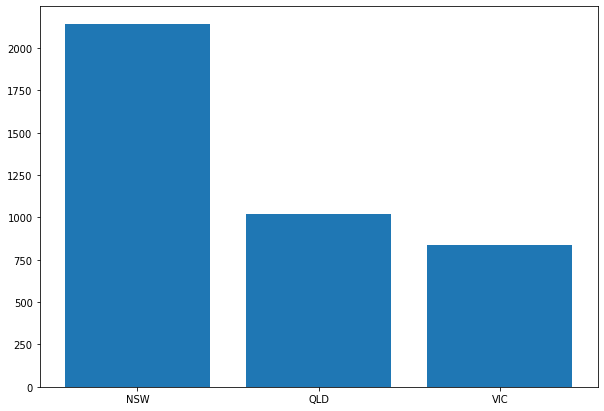

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(custadd.state.unique(), custadd["state"].value_counts())
plt.show()

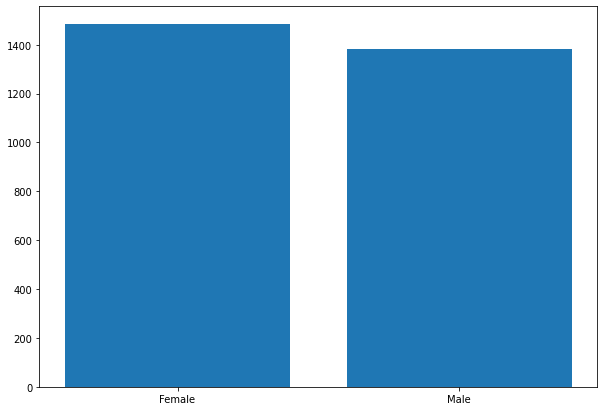

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(custdem.gender.unique(), custdem["gender"].value_counts())
plt.show()

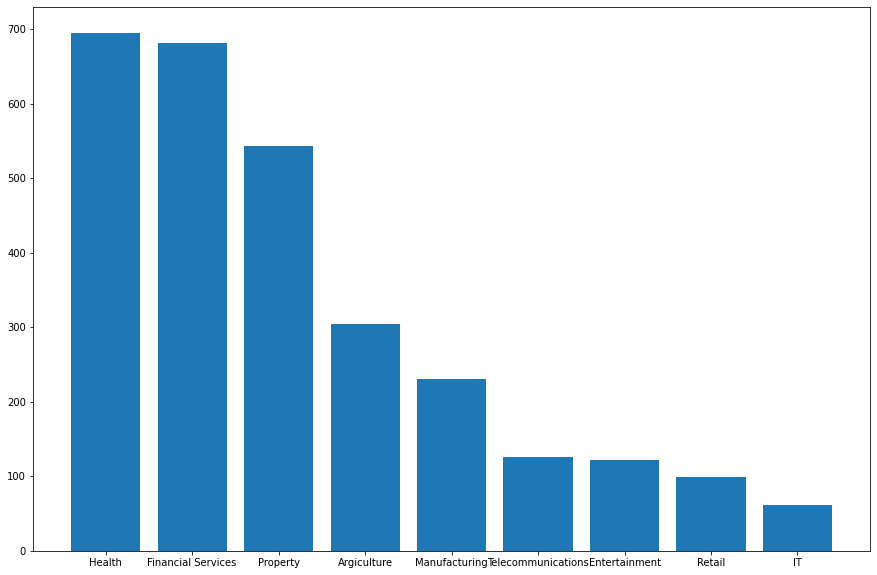

In [ ]:
fig = plt.figure(figsize =(15, 10))
plt.bar(custdem.job_industry_category.unique(), custdem["job_industry_category"].value_counts())
plt.show()

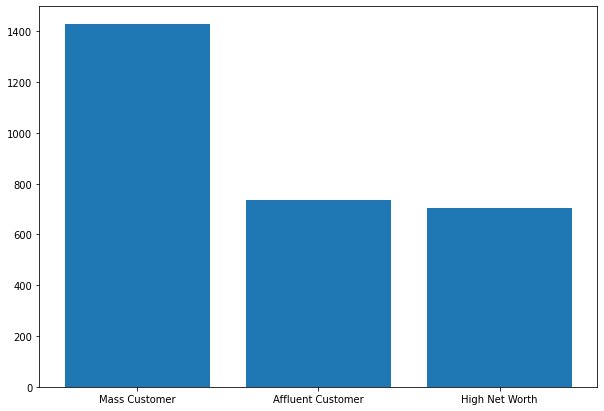

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(custdem.wealth_segment.unique(), custdem["wealth_segment"].value_counts())
plt.show()

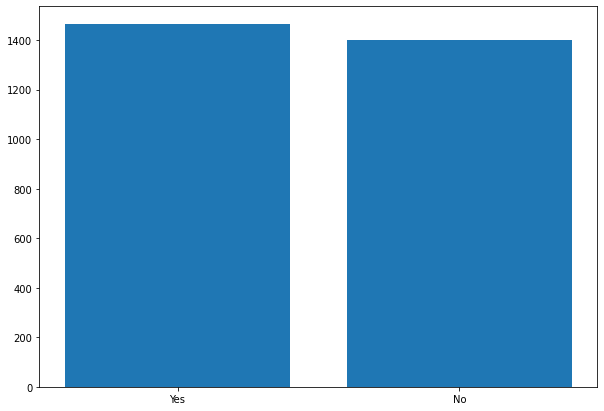

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(custdem.owns_car.unique(), custdem["owns_car"].value_counts())
plt.show()

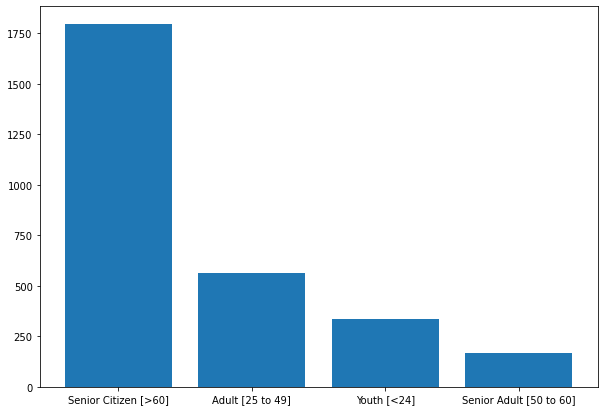

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(custdem.Age_category.unique(), custdem["Age_category"].value_counts())
plt.show()

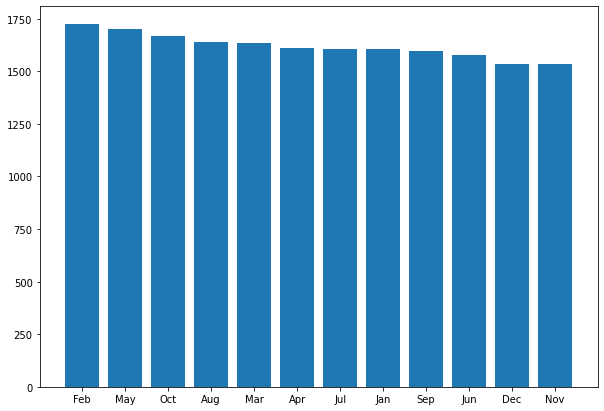

In [ ]:

fig = plt.figure(figsize =(10, 7))
plt.bar(trans.transaction_month.unique(), trans["transaction_month"].value_counts())
plt.show()

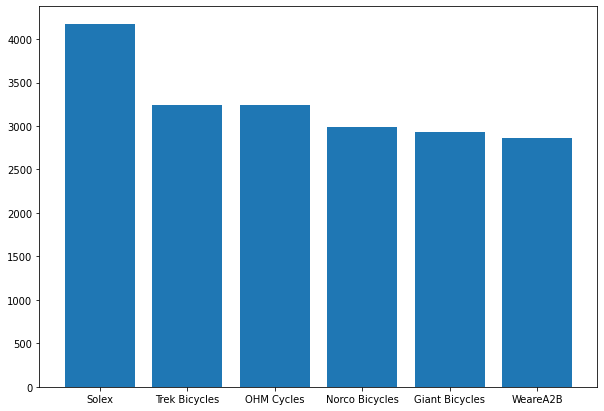

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(trans.brand.unique(), trans["brand"].value_counts())
plt.show()

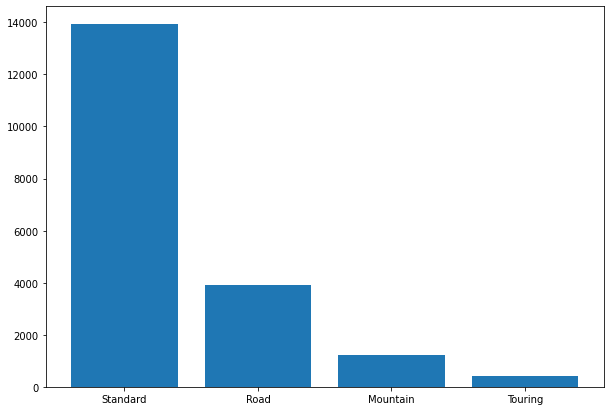

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(trans.product_line.unique(), trans["product_line"].value_counts())
plt.show()

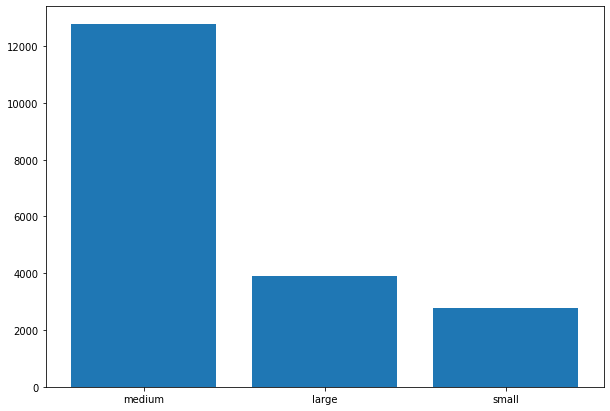

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(trans.product_size.unique(), trans["product_size"].value_counts())
plt.show()

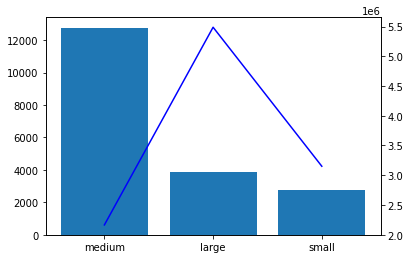

In [ ]:
results9 = trans.groupby("product_size").sum()

fig, ax1=plt.subplots()

ax2 = ax1.twinx()
ax1.bar(trans.product_size.unique(), trans["product_size"].value_counts())
ax2.plot(trans.product_size.unique(), results9["standard_cost"], 'b-')
plt.show()

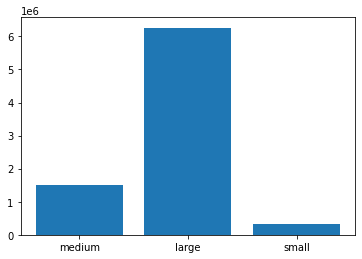

In [ ]:
results3 = trans.groupby("product_size").sum()
plt.bar(trans.product_size.unique(), results3["profit_margin"])
plt.show()

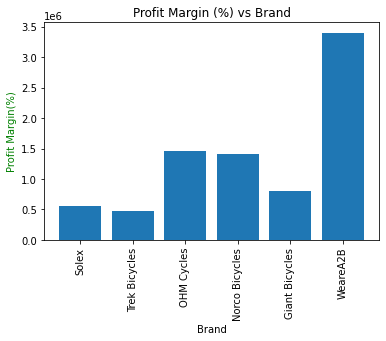

In [ ]:
results2 = trans.groupby("brand").sum()
plt.bar(trans.brand.unique(), results2["profit_margin"])

plt.xticks(rotation = 'vertical')
plt.ylabel('Profit Margin(%)', color='g')
plt.xlabel('Brand')
plt.title("Profit Margin (%) vs Brand")
plt.show()

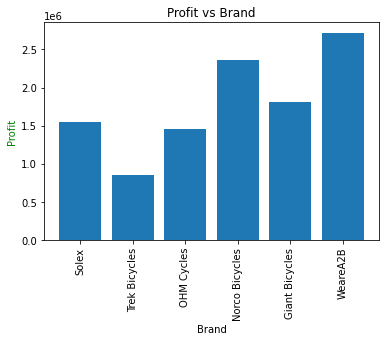

In [ ]:
results2 = trans.groupby("brand").sum()
plt.bar(trans.brand.unique(), results2["profit"])

plt.xticks(rotation = 'vertical')
plt.ylabel('Profit', color='g')
plt.xlabel('Brand')
plt.title("Profit vs Brand")
plt.show()

In [ ]:
trans.to_csv('trans.csv',index=False)

In [ ]:
custdem.to_csv('custdem.csv',index=False)

In [ ]:
custadd.to_csv('custadd.csv',index=False)

In [ ]:
custadd.isna().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64